<a href="https://colab.research.google.com/github/JikhilReji/Climate-Evolution/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
/content/drive/MyDrive
 Annual_Surface_Temperature_Change.csv   Chinnu/                      'thesis_(01_03_24).py'
 BSBI/                                  'Colab Notebooks'/             Thesis-1.ipynb
 calls-20230109151809.xml               'Sea level rise latest.xlsx'   world_risk_index.csv
'Carbon emissions.csv'                   sms-20230109151809.xml
Handling missing values...>>>>>>>>>>>>>>>>>>>>> Annual temperature change
   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   
5         6                        Angola   AO  AGO   
6         7                      Anguilla   AI  AIA   
7         8           Antigua and Barbuda   AG  ATG   

                                           Ind

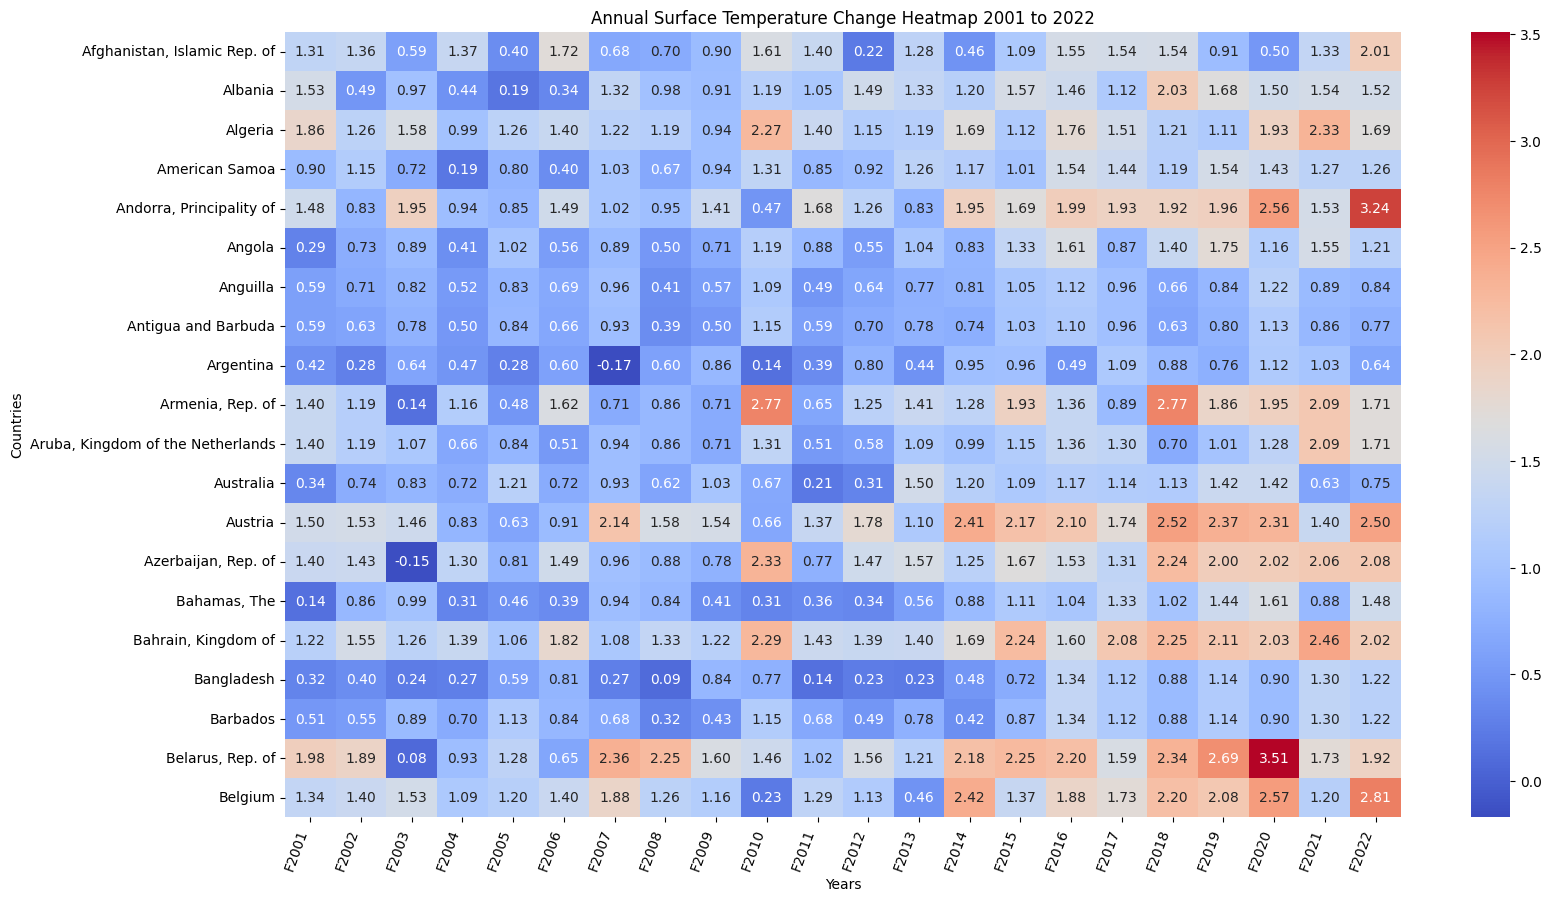

generating heatmap ::::::::: Carbon Emissions Heatmap 2003 to 2021


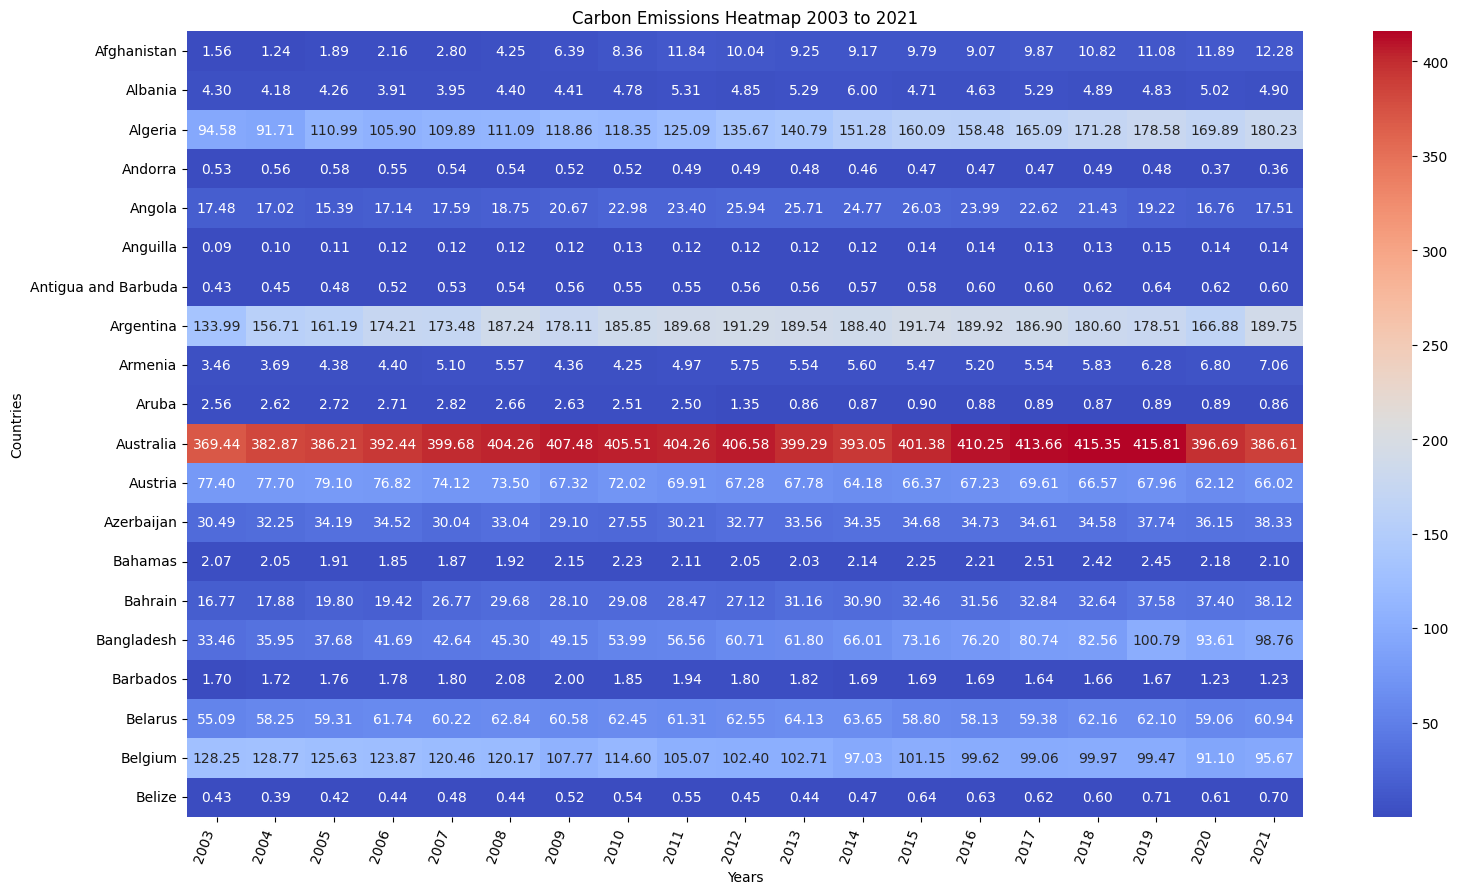

generating heatmap ::::::::: Sea Level Rise Heatmap area of impact(in sq.km.) 2000 to 2021 


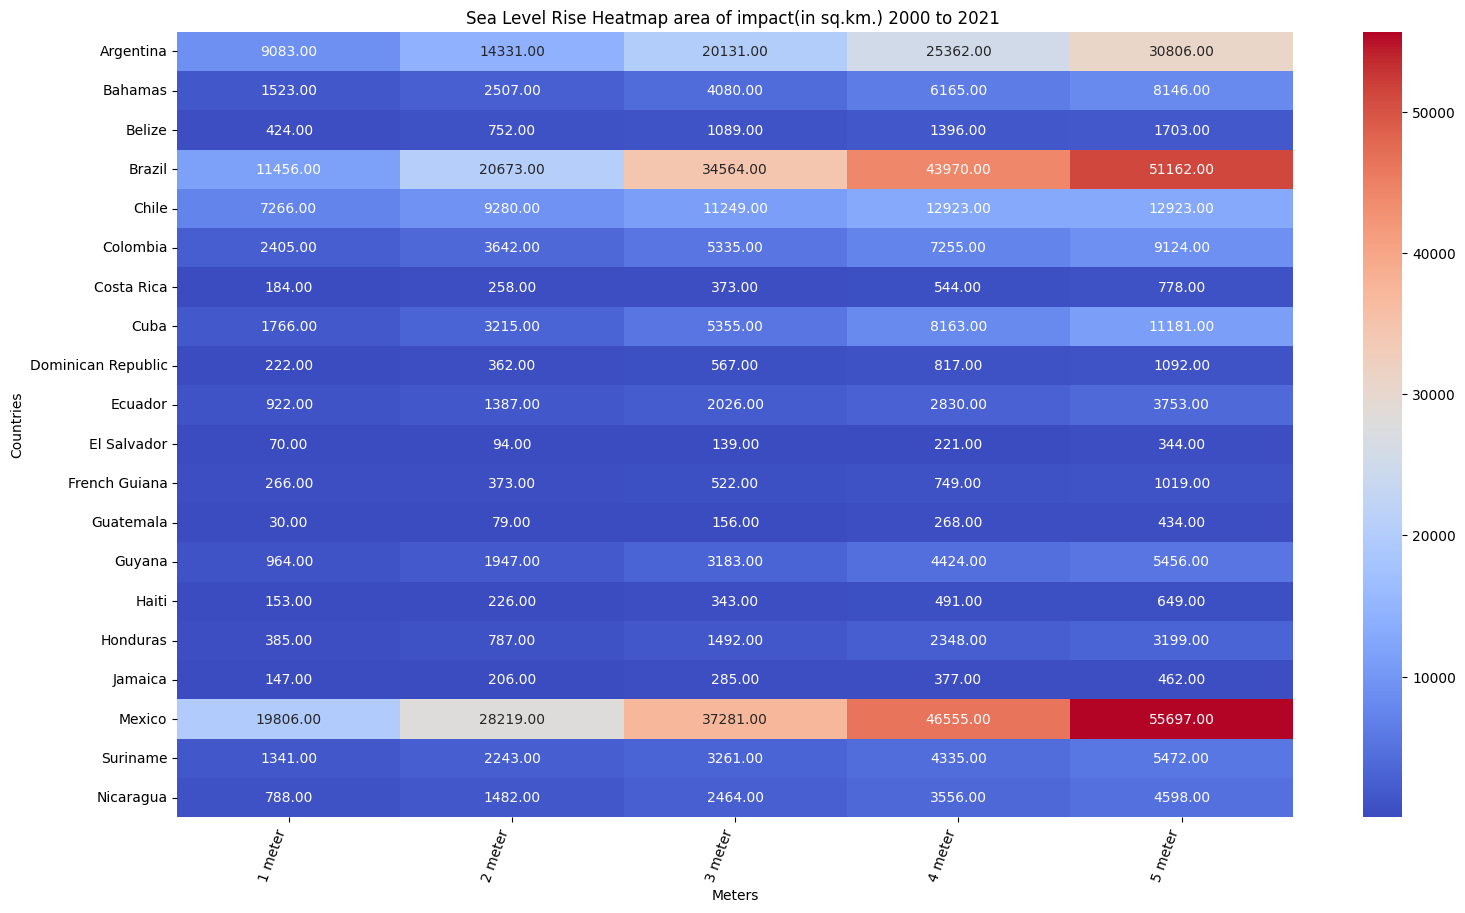

generating heatmap ::::::::: World Risk Index Heatmap of 2011 to 2021


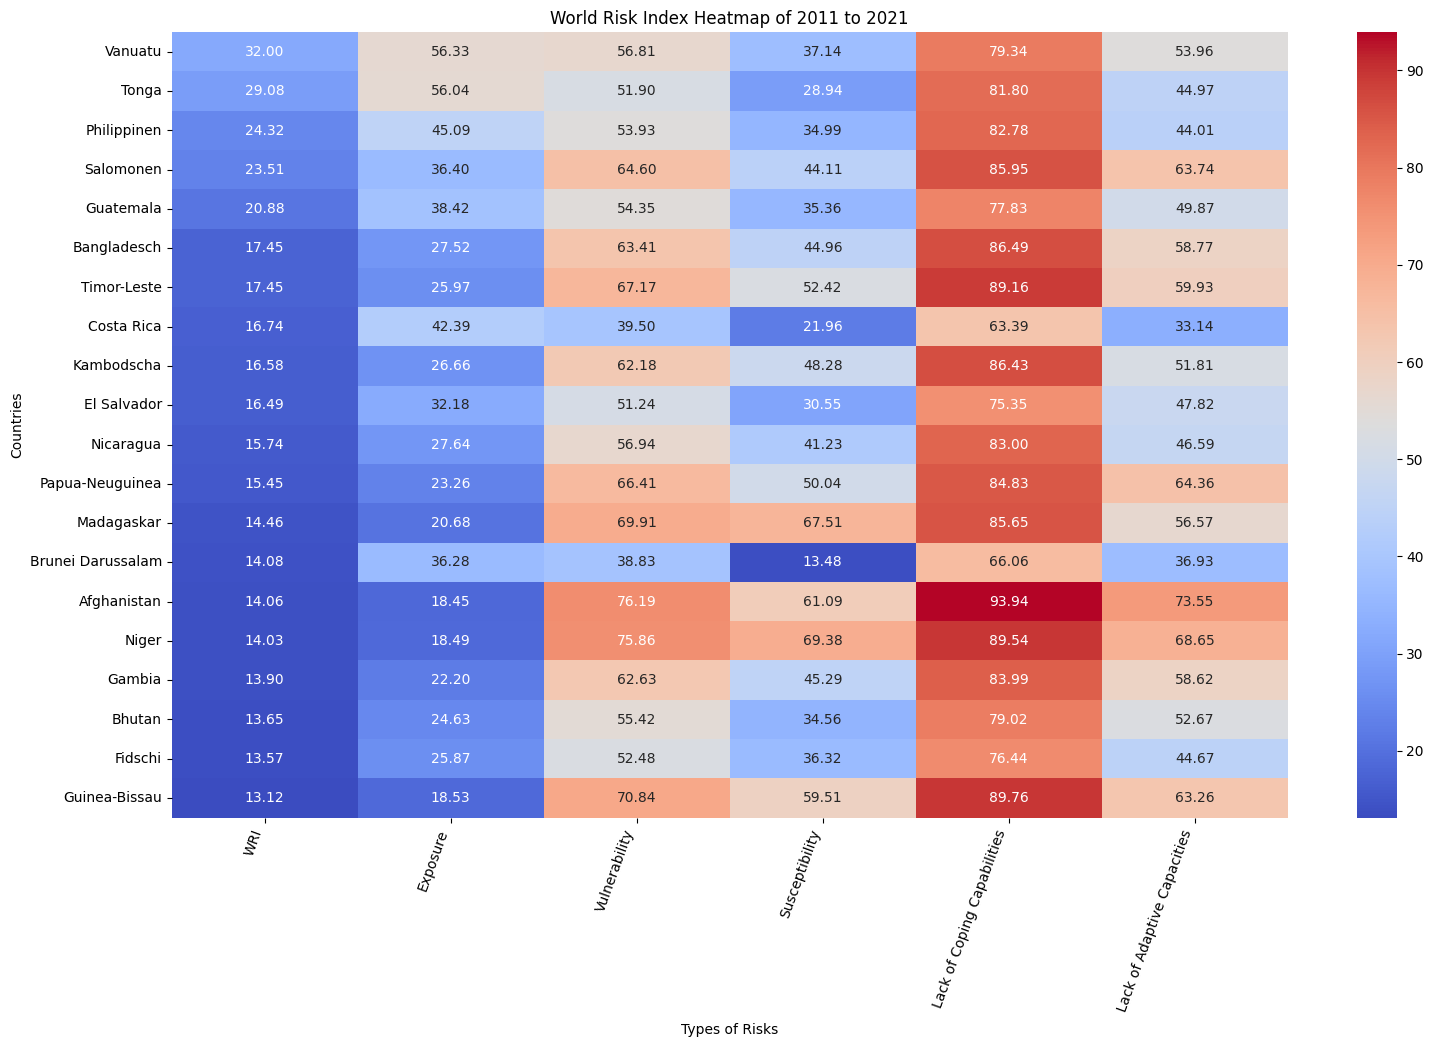

Mean Squared Error: 24.954923501503607


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/
%ls

import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

!pip install pandas numpy seaborn matplotlib scikit-learn xlrd openpyxl

annual_temp_change_path = "/content/drive/MyDrive/Annual_Surface_Temperature_Change.csv"
carbon_emissions_path = "/content/drive/MyDrive/Carbon emissions.csv"
sea_level_rise_path = "/content/drive/MyDrive/Sea level rise latest.xlsx"
world_risk_index_path = "/content/drive/MyDrive/world_risk_index.csv"

annual_temp_change_path = pd.read_csv(annual_temp_change_path)
carbon_emissions_path =pd.read_csv(carbon_emissions_path)
sea_level_rise_path = pd.read_excel(sea_level_rise_path)
world_risk_index_path = pd.read_csv(world_risk_index_path)

def load_and_clean_data(dataframe_data, name, remove_row_by_column = 'Country'):
  print("Handling missing values...>>>>>>>>>>>>>>>>>>>>>", name)
  # remove the row if the first column of the row is empty
  dataframe_data = dataframe_data[dataframe_data.loc[:,remove_row_by_column].notna()]
  missing_values = dataframe_data.isnull().sum()
  if missing_values.sum() > 0:
      for col in dataframe_data.columns:
          dataframe_data[col].ffill(inplace=True)
  # pd.set_option('display.max_columns', None) # to see all the columns in the terminal (columns will get printed on multiple lines)
  # print(dataframe_data.head()) # print first five rows
  print(dataframe_data.iloc[:8,:]) # print by index [starting row:ending row, stating column: ending column]

  return dataframe_data

annual_temp_change = load_and_clean_data(annual_temp_change_path, name = "Annual temperature change")
carbon_emissions = load_and_clean_data(carbon_emissions_path, name = "Carbon emission path", remove_row_by_column = 'Year')
sea_level_rise = load_and_clean_data(sea_level_rise_path, name = "Sea level rise path", remove_row_by_column = 'Country Code')
world_risk_index = load_and_clean_data(world_risk_index_path, name = "World risk index")

# Function to truncate tick labels
# def truncate_label(label, max_length=14):
#     if len(label) > max_length:
#         return label[:max_length] + '...'
#     else:
#         return label


# Generate Heat Map
def generate_heatmap(dataframe_data, title, columns_to_discard = None, transpose_data = False ,set_index_column = 'Country', x_axis_label='Countries', y_axis_label= 'Countries', r_start =None , r_end=20, c_start=None, c_end=20):
    data = copy.deepcopy(dataframe_data)
    print("generating heatmap :::::::::", title)
    # set the specific field as the index field
    data.set_index(set_index_column, inplace=True)
    # remove the string fields
    if columns_to_discard:
      data.drop(columns=columns_to_discard, inplace=True)
    # reduce the data size for the easiness of ploting it.
    data = data.iloc[r_start:r_end,c_start:c_end]
    # data = data.iloc[:10,:20]
    # print(data.to_dict(orient='list'))
    if transpose_data:
      data = data.T
    plt.figure(figsize=(18, 10.2))
    sns.heatmap(data.astype(float), cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
    plt.xticks(rotation=70, ha='right')
    # plt.yticks(range(len(data.index)), [truncate_label(label) for label in data.index], rotation=-45, ha='right')
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.show()


# Generate heat maps for each dataset
generate_heatmap(annual_temp_change, "Annual Surface Temperature Change Heatmap 2001 to 2022", columns_to_discard = ['ObjectId','ISO2','ISO3','Indicator','Unit','Source','CTS_Code','CTS_Name','CTS_Full_Descriptor'], x_axis_label='Years',r_start =None , r_end=20, c_start=40, c_end=None )

generate_heatmap(carbon_emissions, "Carbon Emissions Heatmap 2003 to 2021",transpose_data= True, set_index_column = 'Year', x_axis_label = 'Years',r_start = 43 , r_end=None, c_start=None, c_end=20)

generate_heatmap(sea_level_rise, "Sea Level Rise Heatmap area of impact(in sq.km.) 2000 to 2021 ", columns_to_discard = ['Country Code','Country Area (Sq. km.)', '1 meter.1', '2 meter.1','3 meter.1','4 meter.1','5 meter.1'], x_axis_label='Meters')

generate_heatmap(world_risk_index, "World Risk Index Heatmap of 2011 to 2021",  columns_to_discard = ['Year','Exposure Category','WRI Category','Vulnerability Category','Susceptibility Category'], x_axis_label='Types of Risks')

combined_data = pd.merge(annual_temp_change, world_risk_index, on='Country')
combined_data = pd.merge(combined_data, sea_level_rise, on='Country')
# combined_data = pd.merge(combined_data, world_risk_index, on='Year')
# print(combined_data.head())


# Modeling

# Split Data into Training and Testing Sets
# X = combined_data.drop('Country', axis=1)  # Assuming 'Target_Variable' is the variable you want to predict

# Convert columns of X to numeric
# print(combined_data)
X = combined_data.drop(['ObjectId','Country','ISO2','ISO3','Indicator','Unit', 'Source','CTS_Code','CTS_Name','CTS_Full_Descriptor','Exposure Category', 'WRI Category', 'Vulnerability Category','Susceptibility Category','Country Code','Year','Country Area (Sq. km.)', '1 meter.1', '2 meter.1',  '3 meter.1',  '4 meter.1',  '5 meter.1' ], axis=1)
y = combined_data['Country']
# annual_temp_change.drop(columns=['ObjectId','Country','ISO2','ISO3','Indicator','Unit','Source','CTS_Code','CTS_Name','CTS_Full_Descriptor'], inplace=True)
# world_risk_index.drop(columns=['Year','Country','Exposure Category','WRI Category','Vulnerability Category','Susceptibility Category'], inplace=True)
# sea_level_rise.drop(columns=['Country Code', 'Country','Country Area (Sq. km.)', '1 meter.1', '2 meter.1','3 meter.1','4 meter.1','5 meter.1'], inplace=True)
X = X.apply(pd.to_numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)